# CIFAR-10 - Object Recognition in Images

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

CIFAR-10 is a labeled subset of the 80 million tiny images dataset. When the dataset was created, students were paid to label all of the images.

he label classes in the dataset are:

   1. Airplane 
   2. Automobile 
   3. Bird 
   4. Cat 
   5. Deer 
   6. Dog 
   7. Frog 
   8. Horse 
   9. Ship 
   10. Truck
  

In [1]:
#Importing the required libraries

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Load the CIFAR-10 data

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

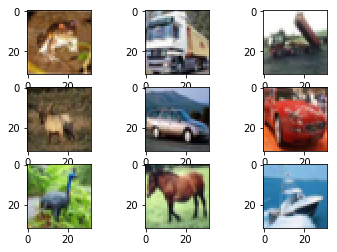

In [3]:
#Display few images from the dataset

for i in range(0, 9):
    plt.subplot(3,3,i + 1)
    plt.imshow((X_train[i]))
# show the plot
plt.show()

In [4]:
#Convert the input into floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize the data such that the values are betwenn 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train)

[[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 0.07843138]]

  [[0.7058824  0.54509807 0.3764706 ]
   [0.6

In [5]:
#one hot encode the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [6]:
#Assingning values to hyperparameters

lr_rate = 0.01
batch_size = 35
epochs = 20
n_classes = 10

In [7]:
#create the model
model = Sequential()

#Layer 1
model.add(Convolution2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 2
model.add(Convolution2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 3
model.add(Convolution2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())  #Flattens the previous layer into a huge vector

#Fully connected layer
model.add(Dense(512, activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.30))
model.add(Dense(10, activation = 'softmax'))

In [8]:
#compile the CNN
#from keras.optimizers import SGD
#sgd = SGD(lr = lr_rate)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
#Fit the CNN model to our dataset
output = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 117s 2ms/step - loss: 1.5807 - acc: 0.4187 - val_loss: 1.2714 - val_acc: 0.5509
Epoch 2/20
50000/50000 [==============================] - 116s 2ms/step - loss: 1.2542 - acc: 0.5516 - val_loss: 1.1266 - val_acc: 0.6032
Epoch 3/20
50000/50000 [==============================] - 118s 2ms/step - loss: 1.1338 - acc: 0.5958 - val_loss: 1.0014 - val_acc: 0.6490
Epoch 4/20
50000/50000 [==============================] - 115s 2ms/step - loss: 1.0525 - acc: 0.6273 - val_loss: 0.9438 - val_acc: 0.6694
Epoch 5/20
50000/50000 [==============================] - 81s 2ms/step - loss: 0.9985 - acc: 0.6484 - val_loss: 0.8973 - val_acc: 0.6898
Epoch 6/20
50000/50000 [==============================] - 72s 1ms/step - loss: 0.9601 - acc: 0.6643 - val_loss: 0.9065 - val_acc: 0.6845
Epoch 7/20
50000/50000 [==============================] - 71s 1ms/step - loss: 0.9264 - acc: 0.6746 - val_loss: 0.8158 - val

In [10]:
print(model.evaluate(X_test, y_test))

10000/10000 [==============================] - 4s 398us/step
[0.7156234250545501, 0.7579]


Text(0.5, 1.0, 'Accuracy Curves')

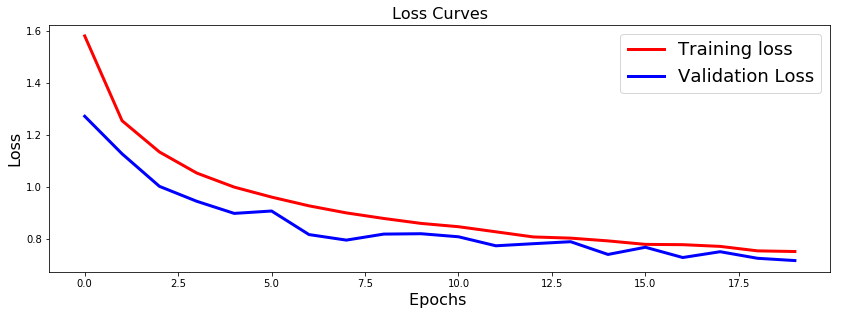

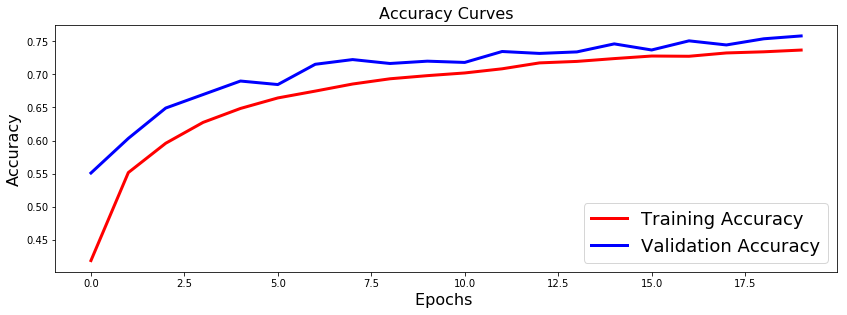

In [11]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(output.history['loss'],'r',linewidth=3.0)
plt.plot(output.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(output.history['acc'],'r',linewidth=3.0)
plt.plot(output.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Extensions To Improve Model Performance

Below are some ideas that you can try to extend upon the models and improve model performance.

    Train for More Epochs. Each model was trained for a very small number of epochs, 25. It is common to train large convolutional neural networks for hundreds or thousands of epochs. I would expect that performance gains can be achieved by significantly raising the number of training epochs.
    Image Data Augmentation. The objects in the image vary in their position. Another boost in model performance can likely be achieved by using some data augmentation. Methods such as standardization and random shifts and horizontal image flips may be beneficial.
    Deeper Network Topology. The larger network presented is deep, but larger networks could be designed for the problem. This may involve more feature maps closer to the input and perhaps less aggressive pooling. Additionally, standard convolutional network topologies that have been shown useful may be adopted and evaluated on the problem

In [12]:
from keras.layers.advanced_activations import LeakyReLU

model1 = Sequential()

#Layer 1
model1.add(Convolution2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (32, 32, 3)))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.20))

#Layer 2
model1.add(Convolution2D(64, kernel_size = (3,3), activation = 'linear'))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

#Layer 3
model1.add(Convolution2D(32, kernel_size = (3,3), activation = 'linear'))
model1.add(LeakyReLU(alpha = 0.1)) 
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.30))

model1.add(Flatten())

#Fully connected layer
model1.add(Dense(256, activation = 'linear', kernel_initializer = 'uniform'))
model1.add(LeakyReLU(alpha = 0.1))
model1.add(Dropout(0.20))
model1.add(Dense(10, activation = 'softmax'))

In [26]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adadelta
from keras.utils.data_utils import Sequence
import numpy as np

delta = Adadelta(lr = 1)
model1.compile(loss = 'categorical_crossentropy', optimizer = delta , metrics = ['accuracy'])
 
batch_size = 100
epochs = 50
datagen = ImageDataGenerator(zoom_range=0.2, # randomly zoom into images
                             rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             vertical_flip=False)  # randomly flip images
 
# Fit the model on the batches generated by datagen.flow().
history1 = model1.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=X_train.shape[0] // batch_size,
                        epochs=35,verbose=1,validation_data=(X_test,y_test))

Epoch 1/35
500/500 [==============================] - 84s 168ms/step - loss: 1.8512 - acc: 0.3173 - val_loss: 1.5358 - val_acc: 0.4413
Epoch 2/35
500/500 [==============================] - 81s 162ms/step - loss: 1.6095 - acc: 0.4104 - val_loss: 1.3547 - val_acc: 0.5173
Epoch 3/35
500/500 [==============================] - 81s 161ms/step - loss: 1.5052 - acc: 0.4533 - val_loss: 1.3282 - val_acc: 0.5190
Epoch 4/35
500/500 [==============================] - 81s 161ms/step - loss: 1.4207 - acc: 0.4887 - val_loss: 1.1669 - val_acc: 0.5825
Epoch 5/35
500/500 [==============================] - 81s 162ms/step - loss: 1.3736 - acc: 0.5058 - val_loss: 1.1303 - val_acc: 0.5921
Epoch 6/35
500/500 [==============================] - 81s 161ms/step - loss: 1.3325 - acc: 0.5206 - val_loss: 1.1384 - val_acc: 0.5862
Epoch 7/35
500/500 [==============================] - 81s 162ms/step - loss: 1.3004 - acc: 0.5345 - val_loss: 1.0576 - val_acc: 0.6230
Epoch 8/35
500/500 [==============================] - 8

In [27]:
print(model1.evaluate(X_test, y_test))

10000/10000 [==============================] - 5s 458us/step
[0.8303051675796509, 0.711]


In [28]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 886us/step


In [29]:
print (predictions)

[[2.15087566e-04 6.96347854e-07 9.57814157e-02 9.05695781e-02
  1.02250367e-01 6.46771610e-01 1.71162710e-02 4.67181727e-02
  5.35591156e-04 4.11951696e-05]
 [3.79063364e-04 7.01348199e-06 9.06617716e-02 8.78777206e-02
  1.42534878e-02 7.62360990e-01 1.38687296e-02 2.95198187e-02
  9.64366831e-04 1.07094966e-04]
 [5.34320179e-08 1.63418963e-06 1.01270049e-03 9.74068069e-04
  6.39933160e-06 1.48914914e-04 9.97852921e-01 1.09205087e-06
  1.56280112e-06 7.54347411e-07]
 [5.55567269e-04 1.49307662e-05 3.79064009e-02 7.52275944e-01
  2.98298546e-03 3.36498171e-02 1.72120094e-01 3.34106386e-04
  1.05738523e-04 5.44094401e-05]
 [1.01621855e-09 9.99991179e-01 9.57604967e-14 4.58345775e-12
  4.24114411e-14 2.96662516e-13 1.16855319e-11 1.85245048e-11
  4.63983092e-08 8.80249445e-06]
 [6.27208365e-08 9.99994040e-01 1.90855595e-11 2.74840446e-11
  1.27170887e-12 2.21736865e-12 1.48055124e-10 2.63355865e-11
  3.55297948e-06 2.20825905e-06]
 [2.40739271e-01 4.27268911e-03 2.71418035e-01 2.21724257e

In [30]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0000001
1.0
1.0
0.9999999
1.0000001
1.0
1.0


In [31]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[5 5 6 3 1 1 2 6 8]


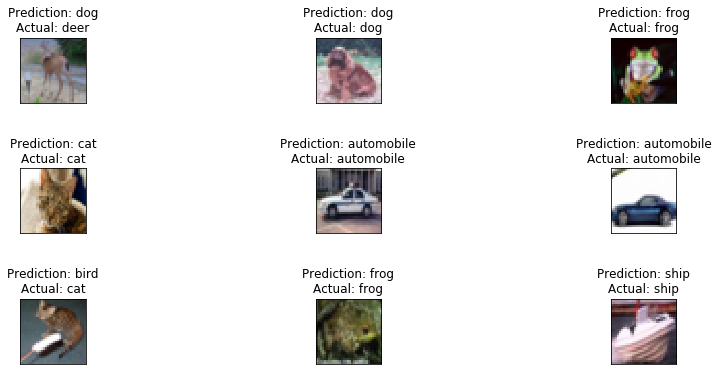

In [32]:

fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([0,1,2]))
    
# show the plot
plt.show()

Text(0.5, 1.0, 'Accuracy Curves')

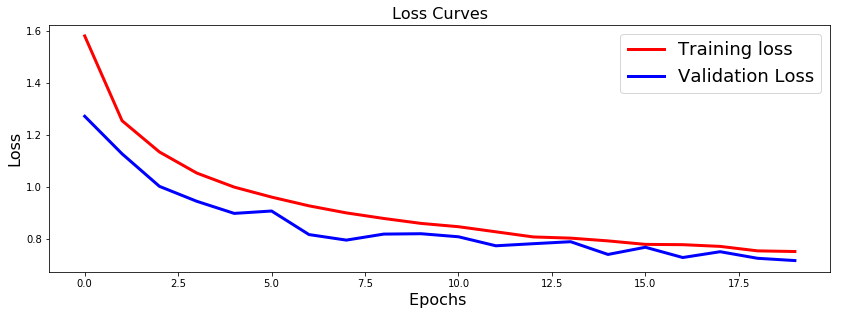

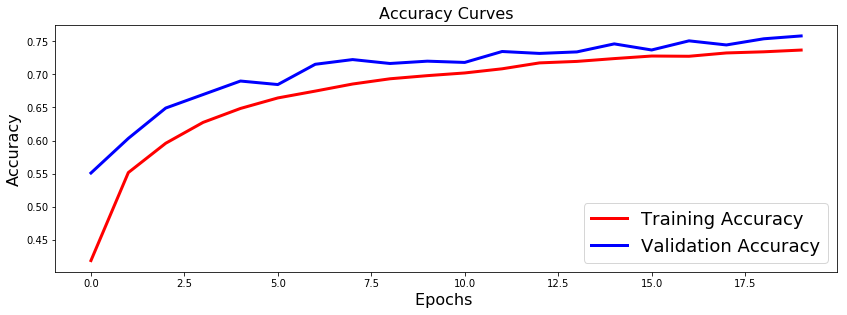

In [33]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(output.history['loss'],'r',linewidth=3.0)
plt.plot(output.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(output.history['acc'],'r',linewidth=3.0)
plt.plot(output.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)